In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-paper')

## Data

In [3]:
# datahw01 = pd.read_csv('datasethw01.csv')
datahw01 = pd.read_excel('dataset_re_full2.xlsx')
datahw01 = datahw01.iloc[:64000,:] # Usando 64000 observações (~2/3) ou usar tudo ? 
                                   # (pouca difecença no tempo p/ ler)
datahw01.size, datahw01.shape

(512000, (64000, 8))

In [4]:
datahw01.head()

,Signal (dBm),Speed (m/s),Distance from site (m),Call Test Duration (s),Call Test Result,Call Test Technology,Call Test Setup Time (s),MOS
0,-61,68.800003,1048.60,90.0,1,1,0.56,2
1,-61,68.769997,1855.54,90.0,1,1,0.45,3
2,-71,69.169998,1685.62,90.0,1,1,0.51,2
3,-65,69.279999,1770.92,90.0,1,1,0.00,1
4,-103,0.820000,256.07,60.0,1,1,3.35,4


## Unconditional mono-variate analysis

In [4]:
unc_monovar = datahw01.describe().iloc[1:3,:-1].append(datahw01.skew()[:-1], ignore_index=True)
unc_monovar.index = ['Mean $\mu_d$','std $\sigma_d$','Skewness $\gamma_d$']
unc_monovar

,Signal (dBm),Speed (m/s),Distance from site (m),Call Test Duration (s),Call Test Result,Call Test Technology,Call Test Setup Time (s)
Mean $\mu_d$,-78.926719,7.964967,8080.703057,83.701534,0.994859,1.262719,2.648667
std $\sigma_d$,17.568766,16.868123,51598.751095,80.819641,0.071514,0.461635,2.025738
Skewness $\gamma_d$,-0.197799,2.700842,7.867378,9.509779,-13.839907,0.778936,1.792427


In [66]:
# unc_monovar.to_excel('hw01-results/hw01-data/unc_monovar.xlsx')

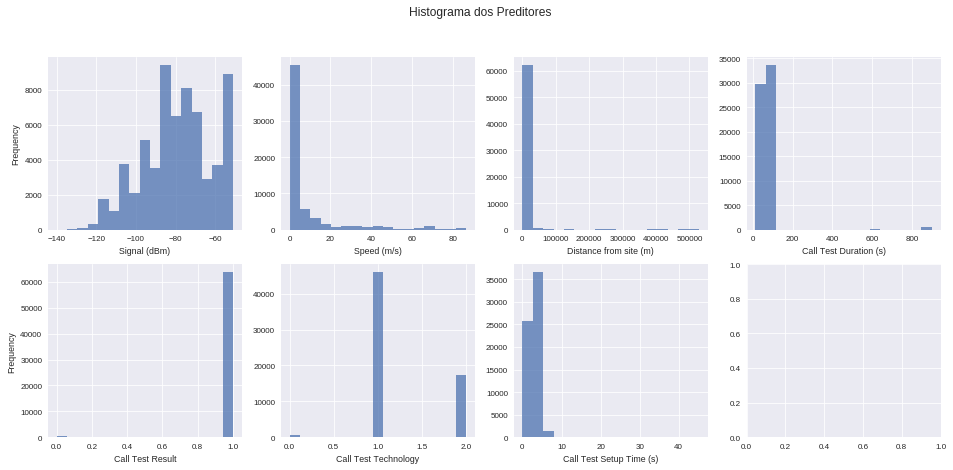

In [63]:
fig, ax = plt.subplots(2, 4, figsize=(16, 7)) 
ax = ax.ravel()
fig.suptitle('Histograma dos Preditores')
for i in range(0, 7):
    ax[i].set_xlabel(datahw01.columns[i])
    ax[0].set_ylabel('Frequency')
    ax[4].set_ylabel('Frequency')
    ax[i].hist(datahw01.iloc[:, i], bins='sturges', alpha=.75)
#     plt.savefig('hw01-results/hw01-figs/fighw1.pdf')

## Class-conditional mono-variate analysis

In [6]:
cls = datahw01.groupby('MOS')
classes = ['Bad (1)', 'Poor (2)', 'Fair (3)', 'Good (4)']
print('Classe  | Quantidade')
for i in cls.indices:
    print(f'{classes[i-1]} |    {cls.get_group(i).iloc[:,1:].shape[0]}')

Classe  | Quantidade
Bad (1) |    10169
Poor (2) |    10073
Fair (3) |    16863
Good (4) |    26895


In [7]:
cls_monovar = []
for i in range(len(cls.indices)):
    cls_monovar.append(cls.get_group(i+1).describe().iloc[1:3,:-1].append(cls.get_group(1).skew()[:-1], 
                                                                          ignore_index=True))
    cls_monovar[i].index = ['Mean $\mu_{d|l_%d}$'%(i+1),'std $\sigma_{d|l_%d}$'%(i+1),
                            'Skewness $\gamma_{d|l_%d}$'%(i+1)]
    display(classes[i], cls_monovar[i])

'Bad (1)'

,Signal (dBm),Speed (m/s),Distance from site (m),Call Test Duration (s),Call Test Result,Call Test Technology,Call Test Setup Time (s)
Mean $\mu_{d|l_1}$,-72.980726,8.039038,9089.861158,78.964741,0.992625,0.984463,3.284053
std $\sigma_{d|l_1}$,12.343761,17.791736,57381.430766,52.970058,0.085567,0.127597,1.914296
Skewness $\gamma_{d|l_1}$,0.141812,2.763639,7.828601,13.903960,-11.516650,-7.114264,2.352164


'Poor (2)'

,Signal (dBm),Speed (m/s),Distance from site (m),Call Test Duration (s),Call Test Result,Call Test Technology,Call Test Setup Time (s)
Mean $\mu_{d|l_2}$,-71.244118,9.774605,12380.867186,123.231600,0.997518,0.994540,3.545492
std $\sigma_{d|l_2}$,13.872106,20.288600,68660.092491,169.137665,0.049759,0.077631,1.701652
Skewness $\gamma_{d|l_2}$,0.141812,2.763639,7.828601,13.903960,-11.516650,-7.114264,2.352164


'Fair (3)'

,Signal (dBm),Speed (m/s),Distance from site (m),Call Test Duration (s),Call Test Result,Call Test Technology,Call Test Setup Time (s)
Mean $\mu_{d|l_3}$,-72.113266,8.350709,7026.301398,70.944039,0.998399,0.997687,3.327793
std $\sigma_{d|l_3}$,12.427185,16.129708,47898.922043,44.848601,0.039983,0.097078,1.801302
Skewness $\gamma_{d|l_3}$,0.141812,2.763639,7.828601,13.903960,-11.516650,-7.114264,2.352164


'Good (4)'

,Signal (dBm),Speed (m/s),Distance from site (m),Call Test Duration (s),Call Test Result,Call Test Technology,Call Test Setup Time (s)
Mean $\mu_{d|l_4}$,-88.324261,7.017339,6749.700757,78.686168,0.992489,1.634542,1.646731
std $\sigma_{d|l_4}$,18.844403,15.424714,43325.354948,42.272666,0.086340,0.504273,1.874571
Skewness $\gamma_{d|l_4}$,0.141812,2.763639,7.828601,13.903960,-11.516650,-7.114264,2.352164


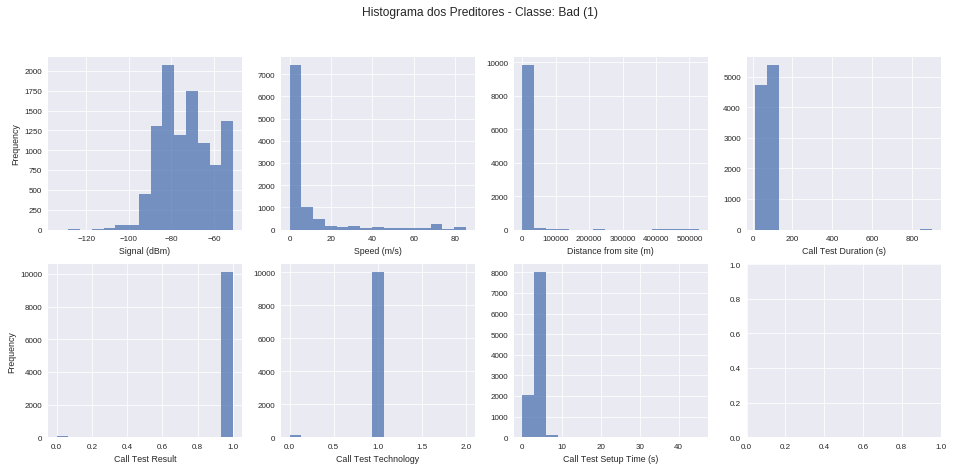

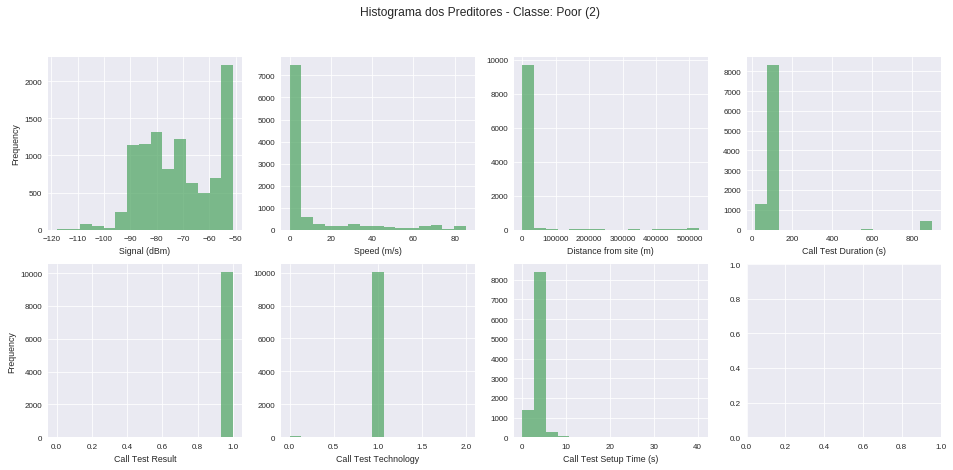

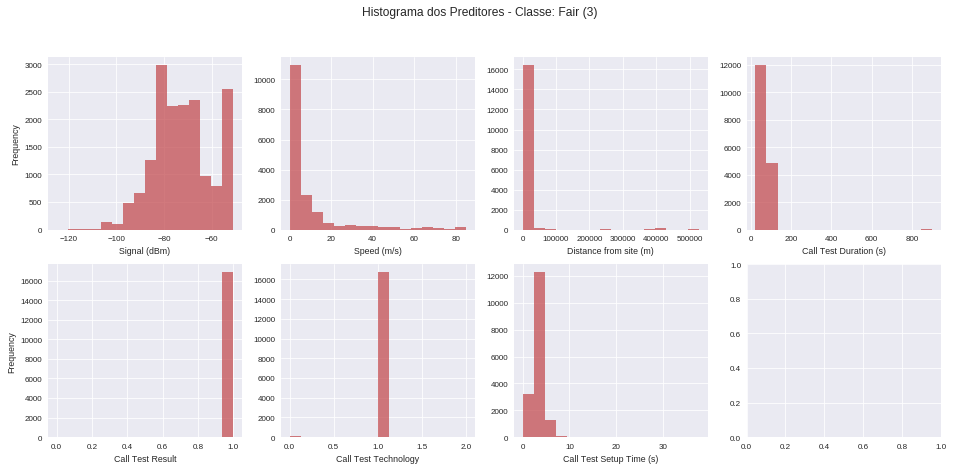

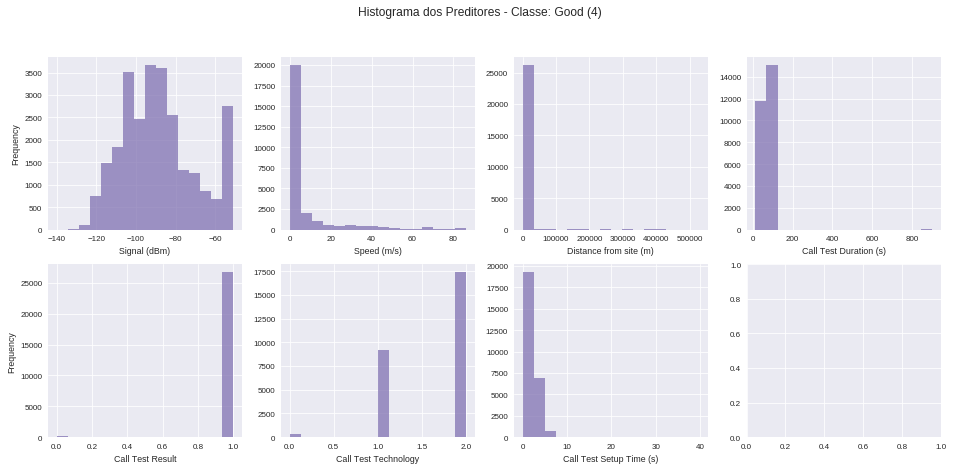

In [60]:
for j in cls.indices:
    fig, ax = plt.subplots(2, 4, figsize=(16, 7)) 
    ax = ax.ravel()
    fig.suptitle(f'Histograma dos Preditores - Classe: {classes[j-1]}')
    for i in range(0, 7):
        ax[i].set_xlabel(cls.get_group(j).columns[i])
        ax[0].set_ylabel('Frequency')
        ax[4].set_ylabel('Frequency')
        ax[i].hist(cls.get_group(j).iloc[:, i], bins='sturges', color=color[j-1], alpha=.75)
#     plt.savefig('fighw1.pdf')

## Tranformações no dados

centering and scaling

In [27]:
scaled_datahw01 = datahw01
((scaled_datahw01 - scaled_datahw01.mean())/scaled_datahw01.std()).head()

,Signal (dBm),Speed (m/s),Distance from site (m),Call Test Duration (s),Call Test Result,Call Test Technology,Call Test Setup Time (s),MOS
0,1.020374,3.606509,-0.136284,0.077932,0.071883,-0.569104,-1.031065,-0.859081
1,1.020374,3.604730,-0.120646,0.077932,0.071883,-0.569104,-1.085366,0.049939
2,0.451182,3.628443,-0.123939,0.077932,0.071883,-0.569104,-1.055747,-0.859081
3,0.792698,3.634965,-0.122286,0.077932,0.071883,-0.569104,-1.307507,-1.768101
4,-1.370232,-0.423578,-0.151644,-0.293265,0.071883,-0.569104,0.346211,0.958959


### Informações

 - Dados:

929 observações e 9 colunas, totalizando size=8370 com 7 preditores e 4 classes

1 = sucesso no teste = 919  
0 = falhas no teste  = 11

- Preditores:

```['Signal (dBm)', 'Speed (m/s)', 'Distance from site (m)', 'Call Test Duration (s)', 'Call Test Result', 'Call Test Technology' , 'Call Test Setup Time (s)']```

- Tecnologias:

| Rating  | Label | Total|
| ------------- | ------------- | ------------- |
| 0  | GSM  | 21 |
| 1  | UMTS  | 270 |
| 2  | LTE  | 639 |


- Classes MOS

4 classes no dataset: 

| Rating  | Label | Total|
| ------------- | ------------- | ------------- |
| 1  | Bad  | 39 |
| 2  | Poor  | 47 |
| 3  | Fair  | 125 |
| 4  | Good  | 719 |

https://en.wikipedia.org/wiki/Mean_opinion_score

Links úteis:

https://pandas.pydata.org/pandas-docs/stable/reference/frame.html  
https://pandas.pydata.org/pandas-docs/stable/reference/series.html

In [9]:
# unicas ocorrencias
# datahw01['MOS'].nunique()
# busca por valores:
# for i in range(8):
#     print(datahw01.iloc[:,i+1].all()==0)
# grupos:
# grouped = datahw01.groupby('MOS')
# print('mos class:')
# for name, group in grouped:
#     print(name)
#     print(group.shape)
# .dropna .replace .apply

(95466, 8)

In [28]:
#TODO: Decidir entrega em .py or notebook
#TODO: descrição do conjunto de amostras utilizado
#TODO: Aplicar transformações nos dados e utilizar mais amostras!
#TODO: dataframe to excel sem latex symbols